In [1]:
import matplotlib.pyplot as plt
import dynamiqs as dq
import jax.numpy as jnp

In [2]:
MHz = 1 * 2 * jnp.pi

In [18]:
omega = 1 * MHz
alpha = 30

sigma = dq.sigmam()
H = 1j * omega / 2 * (jnp.conjugate(alpha) * sigma - alpha * sigma.dag())
t_max = jnp.pi / omega / alpha / 10
t = jnp.linspace(0, t_max, 100)
output = dq.sesolve(H, dq.fock(2, 0), t)

|██████████| 100.0% ◆ elapsed 1.29ms ◆ remaining 0.00ms

/Users/remirousseau/.pyenv/versions/3.13.0/envs/dynamiqs/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/remirousseau/.pyenv/versions/3.13.0/envs/dynamiqs/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


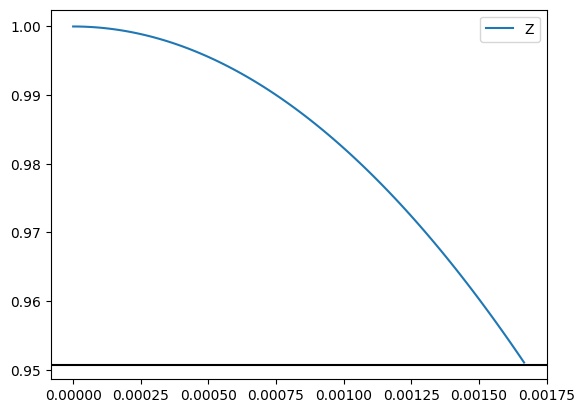

In [19]:
x, y, z = (
    dq.expect(dq.sigmax(), output.states),
    dq.expect(dq.sigmay(), output.states),
    dq.expect(dq.sigmaz(), output.states),
)
# plt.plot(t, x, label="X")
# plt.plot(t, y, label="Y")
plt.plot(t, z, label="Z")
# plt.axhline(jnp.cos(omega * t_max * alpha))
plt.axhline(1 - (omega * t_max * alpha) ** 2 / 2, c="k")
plt.legend()
plt.show()

/Users/remirousseau/.pyenv/versions/3.13.0/envs/dynamiqs/lib/python3.13/site-packages/numpy/ma/core.py:2892: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


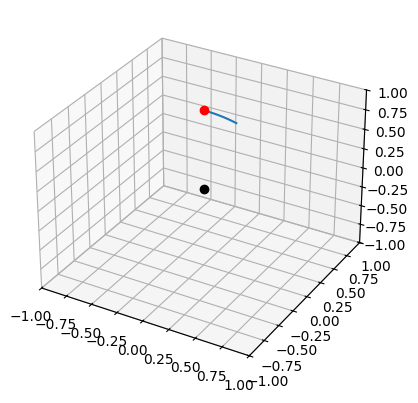

In [60]:
fig = plt.figure()
%matplotlib inline
axis_rotation = 1j * jnp.conjugate(alpha)
ax = fig.add_subplot(111, projection="3d")
ax.plot(x, y, z)
ax.plot(0, 0, 1, "ro")
ax.plot(0, 0, 0, "ko")
ax.plot(
    [-jnp.real(axis_rotation), jnp.real(axis_rotation)],
    [-jnp.imag(axis_rotation), jnp.imag(axis_rotation)],
    [0, 0],
)
ax.plot([jnp.real(axis_rotation)], [jnp.imag(axis_rotation)], [0], "ro")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.show()

In [61]:
omega = 1 * MHz
alpha = 4
N = 100

a = dq.tensor(dq.destroy(N), dq.eye(2))
sigma = dq.tensor(dq.eye(N), dq.sigmam())

H = 1j * omega / 2 * (a.dag() @ sigma - a @ sigma.dag())
t_max = 1
t = jnp.linspace(0, t_max, 1000)
output = dq.sesolve(H, dq.tensor(dq.coherent(N, alpha), dq.fock(2, 0)), t)

|          |   1.0% ◆ elapsed 2.65ms ◆ remaining 0.00ms

|██████████| 100.0% ◆ elapsed 26.76ms ◆ remaining 0.00ms


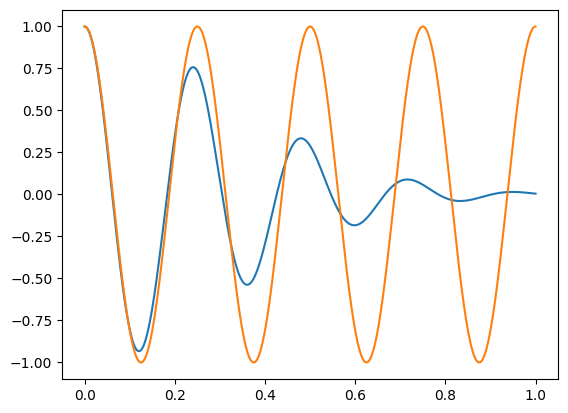

In [62]:
plt.plot(t, dq.expect(dq.tensor(dq.eye(N), dq.sigmaz()), output.states), label="N")
plt.plot(t, jnp.cos(omega * t * alpha), label="X")

# Two mode evolution

In [93]:
omega = 1 * MHz
alpha = jnp.sqrt(100)
N = 200

sigma = dq.tensor(dq.eye(N), dq.sigmam())
a = dq.tensor(dq.destroy(N), dq.eye(2))
H = 1j * omega / 2 * (a.dag() @ sigma - a @ sigma.dag())
t_max = jnp.pi / omega / alpha / 10
t = jnp.linspace(0, t_max, 100)
output = dq.sesolve(H, dq.tensor(dq.coherent(N, alpha), dq.fock(2, 1)), t)

|██████████| 100.0% ◆ elapsed 0.83ms ◆ remaining 0.00ms

|██████████| 100.0% ◆ elapsed 2.37ms ◆ remaining 0.00ms


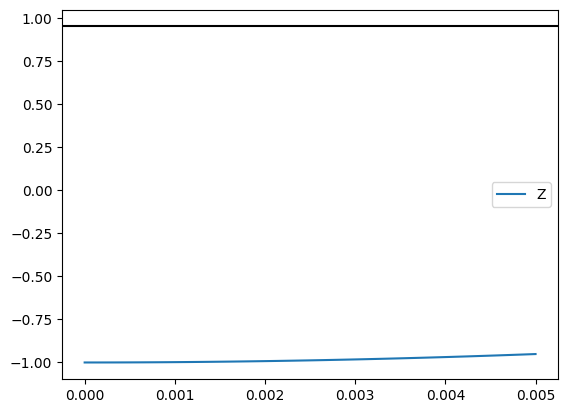

In [94]:
x, y, z = (
    dq.expect(dq.tensor(dq.eye(N), dq.sigmax()), output.states),
    dq.expect(dq.tensor(dq.eye(N), dq.sigmay()), output.states),
    dq.expect(dq.tensor(dq.eye(N), dq.sigmaz()), output.states),
)
# plt.plot(t, x, label="X")
# plt.plot(t, y, label="Y")
plt.plot(t, z, label="Z")
# plt.axhline(jnp.cos(omega * t_max * alpha), c='r')
plt.axhline(1 - (omega * t_max * alpha) ** 2 / 2, c="k")
plt.legend()
plt.show()

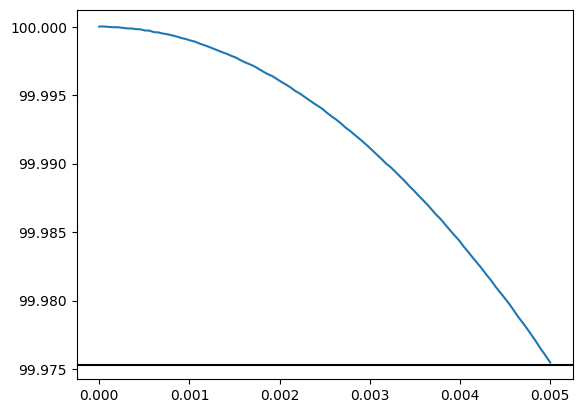

In [95]:
nbars_int = dq.expect(a.dag() @ a, output.states)
plt.plot(t, nbars_int, label="N")
plt.axhline(alpha**2 - (omega * t_max * alpha) ** 2 / 4, c="k")

In [96]:
a = dq.destroy(N)
kappa = omega**2 * t_max**2 / t_max / 4
output_loss = dq.mesolve(0 * dq.eye(N), [jnp.sqrt(kappa) * a], dq.coherent(N, alpha), t)

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|██████████| 100.0% ◆ elapsed 27.14ms ◆ remaining 0.00ms


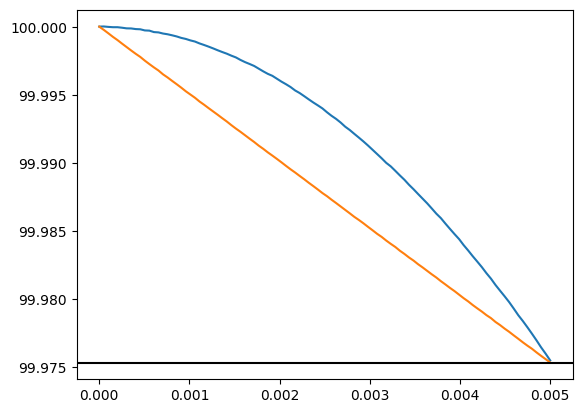

In [97]:
plt.plot(t, nbars_int, label="N")
plt.plot(t, dq.expect(a.dag() @ a, output_loss.states), label="N")
plt.axhline(alpha**2 - (omega * t_max * alpha) ** 2 / 4, c="k")